# Polynomial Regression

problem statement :

Build a machine learning model to predict salary  based on position for a given dataset
https://drive.google.com/open?id=1jKfNxQkybZKprVpCkoL16mTjmSSnCol3


In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score


# loading csv data from the file given in the url
data_set = pd.read_csv("Position_Salaries.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [2]:
data_set

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#### splitting data set

In [3]:
#obtaining samples
X_train = data_set.iloc[:,1:-1].values
y_train = data_set.iloc[:,-1].values
y_train = np.reshape(y_train, (len(y_train),1))

In [4]:
#making an object of polynomial features
poly_features = PolynomialFeatures(degree = 5)

In [5]:
#obtaining polynomial value of train data == polynomial feature
X_poly = poly_features.fit_transform(X_train)

In [6]:
#obtaining an object of regressor
regressor = LinearRegression()

In [7]:
# fitting that to obtain linear regression model
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#retrieving the intercept:
print(regressor.intercept_)
#retrieving the slope:
print(regressor.coef_)

[-41333.33332994]
[[ 0.00000000e+00  1.60731002e+05 -1.00378788e+05  2.81649184e+04
  -3.44638695e+03  1.57692308e+02]]


In [9]:
#pridicting y values
y_pred = regressor.predict(X_poly)

In [10]:
# making new data to predict and plot
test_x    = np.arange(0,10,0.2)
poly_x    = poly_features.fit_transform(test_x.reshape(-1,1))
new_pred  = regressor.predict(poly_x)

#### plotting regresssion line 

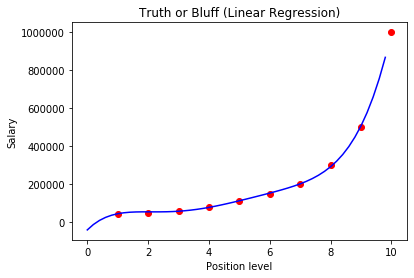

In [11]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(test_x, new_pred, color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [12]:
print('MSE : {}'.format(metrics.mean_squared_error(y_train, y_pred)))
print('RMSE : {}'.format(np.sqrt(metrics.mean_absolute_error(y_train, y_pred))))
print('MAE : {}'.format(metrics.mean_absolute_error(y_train, y_pred)))

MSE : 16382284.38228566
RMSE : 57.97274498337267
MAE : 3360.839160907161
